In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

import os
#Read data
raw_data_path =os.path.join(os.path.pardir,os.path.pardir,'data','raw', 'Dataset7')

train_file_path = os.path.join(raw_data_path,'data.csv')
df = pd.read_csv(train_file_path)
df["Churn"] = np.where(df.Class== "Churned", 1 ,0)
df.info()

ord_enc = OrdinalEncoder()
df["aug_user_type"] = np.where(df.aug_user_type.isnull(), 'Other' ,df.aug_user_type)
df["sep_user_type"] = np.where(df.sep_user_type.isnull(), 'Other' ,df.aug_user_type)
df["aug_fav_a"] = np.where(df.sep_user_type.isnull(), '0' ,df.aug_user_type)
df["sep_fav_a"] = np.where(df.sep_fav_a.isnull(), 'Other' ,df.aug_user_type)

df["aug_user_type"] = ord_enc.fit_transform(df[["aug_user_type"]])
df["sep_user_type"] = ord_enc.fit_transform(df[["sep_user_type"]])
df["aug_fav_a"] = ord_enc.fit_transform(df[["aug_fav_a"]])
df["sep_fav_a"] = ord_enc.fit_transform(df[["sep_fav_a"]])

df =df.drop(['Class'], axis=1)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   network_age                2000 non-null   int64  
 1   Aggregate_Total_Rev        2000 non-null   float64
 2   Aggregate_SMS_Rev          2000 non-null   float64
 3   Aggregate_Data_Rev         2000 non-null   float64
 4   Aggregate_Data_Vol         2000 non-null   float64
 5   Aggregate_Calls            2000 non-null   int64  
 6   Aggregate_ONNET_REV        2000 non-null   int64  
 7   Aggregate_OFFNET_REV       2000 non-null   int64  
 8   Aggregate_complaint_count  2000 non-null   int64  
 9   aug_user_type              1755 non-null   object 
 10  sep_user_type              1794 non-null   object 
 11  aug_fav_a                  1999 non-null   object 
 12  sep_fav_a                  1999 non-null   object 
 13  Class                      2000 non-null   objec

In [5]:
proccessed_data_path =os.path.join(os.path.pardir,os.path.pardir,'data','processed')
write_train_path = os.path.join(proccessed_data_path,'dataset7.csv')
df.to_csv(write_train_path)

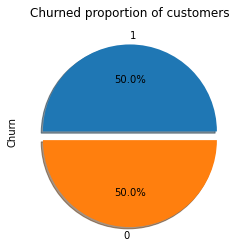

In [6]:
df.Churn.value_counts().plot(kind= 'pie', title='Churned proportion of customers', explode = [0,0.1],autopct='%1.1f%%', shadow=True);
